Import portion

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata as rank 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


# **Class where implemented empirical copula containing fit and plot functions**

In [ ]:
class Empricial_Copula:
  def __init__(self,n):
    self.x_asc=0
    self.y_asc=0
    self.dim=n

  def fit(self,z):
    z_new=[]
    cop = [[0]*self.dim]*self.dim
    lists=[]
    poin=[]
    counter=0
    for i in range(self.dim):
      for j in range(self.dim):
        poin.append([self.x_asc[i],self.y_asc[j]])
    
    c=0
    w=0
    for i in range(len(poin)):          #n*n   ---->n z point  x1y1 x1 y2 x1 y3.....
        if c==self.dim:
          c=0
          w+=1
        count=0
        for k in range(self.dim):   #n points    z=( x1 y1, x2 y2, x3 y3)
          counter+=1
          if (poin[i][0]>=z[k][0] and poin[i][1]>=z[k][1]):    # point_x1>=z_x  
            count+=1
        cop[w][c] = count/self.dim
        c+=1
        lists.append([poin[i][0],poin[i][1],count/self.dim])

    # print(lists)
   
    d={}
    x,y,value=[],[],[]
    for i in lists:
      x.append(i[0])
      y.append(i[1])
      value.append(i[2])
    d['X']=x
    d['Y']=y
    d['Probability']=value
    df=pd.DataFrame(d)
    return cop,df

  def init_value(self,x,y):
    self.x_asc=sorted(x)
    self.y_asc=sorted(y)



  def plot(self,cop):
    x=[i/self.dim for i in range(1,self.dim+1)]
    y=x
    X,Y=np.meshgrid(x, y)
    fig=plt.figure()
    ax= fig.add_subplot(111, projection='3d')
    m=np.array(cop)
    ax.contour3D(X,Y,m,extend3d=True)   #1st plot
    ax.view_init(45,210)
    ax.plot_wireframe(X,Y,m)  #2nd plot
    plt.show()
    
    # ax.view_init(45,135)
    # plt.show()
        
  

       


# **Main starting where mean, covariance and dataset is generated**

In [ ]:
n =500
ap=500
mean = [0,0]
cov = [[1,0.3],[0.3,1]]
z = np.random.multivariate_normal(mean,cov,n)  #100*2
x = z[:,0]
y = z[:,1]

# **implementing empirical copula**

               X         Y  Probability
0      -2.874443 -3.580432        0.000
1      -2.874443 -2.844145        0.000
2      -2.874443 -2.611808        0.000
3      -2.874443 -2.452654        0.000
4      -2.874443 -2.425074        0.000
...          ...       ...          ...
249995  3.620195  2.342798        0.992
249996  3.620195  2.363115        0.994
249997  3.620195  2.454837        0.996
249998  3.620195  2.483760        0.998
249999  3.620195  2.495775        1.000

[250000 rows x 3 columns]


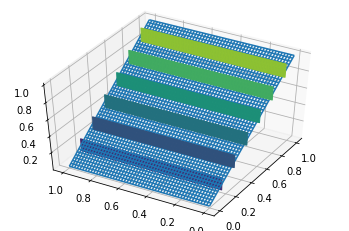

In [ ]:
emp=Empricial_Copula(n)
emp.init_value(x,y)
cop,k=emp.fit(z)
print(k)
emp.plot(cop)



In [ ]:
%pip install prob140

converting dataframe to table

In [ ]:
from datascience import *
from prob140 import *
%matplotlib inline

list1 = np.array(k['X'].to_list())
list2 = np.array(k['Y'].to_list())
list3 = np.array(k['Probability'].to_list())
print(list1)
print(list2)
print(list3)

print(type(list1))
print(type(list2))
print(type(list3))

dist = Table().with_columns(
   "X", list1,
   "Y", list2,
   "Probability", list3)
#dist = Table().domain(list1,list2,list3)
print(dist)

[-2.87444278 -2.87444278 -2.87444278 ...  3.62019544  3.62019544
  3.62019544]
[-3.58043168 -2.84414462 -2.61180834 ...  2.45483671  2.48376012
  2.49577519]
[0.    0.    0.    ... 0.996 0.998 1.   ]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X        | Y        | Probability
-2.87444 | -3.58043 | 0
-2.87444 | -2.84414 | 0
-2.87444 | -2.61181 | 0
-2.87444 | -2.45265 | 0
-2.87444 | -2.42507 | 0
-2.87444 | -2.40443 | 0
-2.87444 | -2.32664 | 0
-2.87444 | -2.24602 | 0
-2.87444 | -2.22587 | 0
-2.87444 | -2.18573 | 0
... (249990 rows omitted)


performing joint distribution

In [ ]:
dist.to_joint()

/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 68141.22000000167
  warnings.warn('Your probabilities sum to {0}'.format(total))


,X=-2.874442777385058,X=-2.7243516821491744,X=-2.695600228622361,X=-2.6041501609574587,X=-2.5977223086220445,X=-2.32080085988828,X=-2.2007583153569437,X=-2.1749270237703233,X=-2.1730046996057615,X=-2.151690410942962,X=-2.1379614046476947,X=-2.1091168800170377,X=-2.0984367250815197,X=-2.0420883706191764,X=-2.03955005503762,X=-2.024159468089304,X=-1.9085199203573078,X=-1.8284039284243325,X=-1.8069074328342734,X=-1.803024166205231,X=-1.775175362841013,X=-1.763666404386756,X=-1.7504059320482217,X=-1.7264123889269773,X=-1.7201289428195174,X=-1.6702611158617047,X=-1.662192314484822,X=-1.6507789206495553,X=-1.594712328446402,X=-1.5783899701098383,X=-1.5647369569534972,X=-1.5564354483925904,X=-1.5508296238399526,X=-1.5363571187527307,X=-1.5116577995879208,X=-1.494984287973162,X=-1.4901855566614755,X=-1.4877592898185656,X=-1.4825075832295163,X=-1.4814933643826507,...,X=1.3608200105810508,X=1.3614848245205078,X=1.3641154734559697,X=1.3673994768426299,X=1.3957106317408106,X=1.4118968414664081,X=1.456566486507752,X=1.4569794285794335,X=1.4659979519524728,X=1.4731878603232558,X=1.4798096747256344,X=1.4953765914353518,X=1.5106760685987555,X=1.5493628756772158,X=1.5921513767056759,X=1.611952839821166,X=1.614154200820118,X=1.624321871086249,X=1.6405335145074964,X=1.645664013064292,X=1.651086581686978,X=1.6720658896165583,X=1.7432091142982478,X=1.7857152465646668,X=1.8438900847622437,X=1.8511938268459085,X=1.9811509210491187,X=2.044047850089965,X=2.0666582714763715,X=2.0844241534141816,X=2.115205748595771,X=2.1172128966183537,X=2.1179715966762074,X=2.131343755478167,X=2.211408604195903,X=2.3943361198240765,X=2.4502045572912516,X=2.5771214892127725,X=2.8521860242812203,X=3.6201954362604867
Y=2.495775190704552,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.022,0.024,0.026,0.028,0.03,0.032,0.034,0.036,0.038,0.04,0.042,0.044,0.046,0.048,0.05,0.052,0.054,0.056,0.058,0.06,0.062,0.064,0.066,0.068,0.07,0.072,0.074,0.076,0.078,0.08,...,0.922,0.924,0.926,0.928,0.930,0.932,0.934,0.936,0.938,0.940,0.942,0.944,0.946,0.948,0.950,0.952,0.954,0.956,0.958,0.960,0.962,0.964,0.966,0.968,0.970,0.972,0.974,0.976,0.978,0.980,0.982,0.984,0.986,0.988,0.990,0.992,0.994,0.996,0.998,1.000
Y=2.483760116686671,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.022,0.024,0.026,0.028,0.03,0.032,0.034,0.036,0.038,0.04,0.042,0.044,0.046,0.048,0.05,0.052,0.054,0.056,0.058,0.06,0.062,0.064,0.066,0.068,0.07,0.072,0.074,0.076,0.078,0.08,...,0.920,0.922,0.924,0.926,0.928,0.930,0.932,0.934,0.936,0.938,0.940,0.942,0.944,0.946,0.948,0.950,0.952,0.954,0.956,0.958,0.960,0.962,0.964,0.966,0.968,0.970,0.972,0.974,0.976,0.978,0.980,0.982,0.984,0.986,0.988,0.990,0.992,0.994,0.996,0.998
Y=2.454836714672262,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.022,0.024,0.026,0.028,0.03,0.032,0.034,0.036,0.038,0.04,0.042,0.044,0.046,0.048,0.05,0.052,0.054,0.056,0.058,0.06,0.062,0.064,0.066,0.068,0.07,0.072,0.074,0.076,0.078,0.08,...,0.920,0.922,0.924,0.926,0.928,0.930,0.932,0.934,0.936,0.938,0.940,0.942,0.944,0.946,0.948,0.950,0.952,0.954,0.956,0.958,0.960,0.962,0.964,0.966,0.968,0.970,0.972,0.974,0.976,0.978,0.980,0.982,0.984,0.986,0.988,0.990,0.990,0.992,0.994,0.996
Y=2.3631154444311577,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.022,0.024,0.026,0.028,0.03,0.032,0.034,0.036,0.038,0.04,0.042,0.044,0.046,0.048,0.05,0.052,0.054,0.056,0.058,0.06,0.062,0.064,0.066,0.068,0.07,0.072,0.074,0.076,0.078,0.08,...,0.920,0.922,0.924,0.926,0.928,0.930,0.932,0.934,0.936,0.938,0.940,0.942,0.944,0.946,0.948,0.950,0.952,0.952,0.954,0.956,0.958,0.960,0.962,0.964,0.966,0.968,0.970,0.972,0.974,0.976,0.978,0.980,0.982,0.984,0.986,0.988,0.988,0.990,0.992,0.994
Y=2.342798218018424,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018,0.02,0.022,0.024,0.026,0.028,0.03,0.032,0.034,0.036,0.038,0.04,0.042,0.044,0.046,0.048,0.05,0.052,0.054,0.056,0.058,0.06,0.062,0.064,0.066,0.068,0.07,0.072,0.074,0.076,0.078,0.08,...,0.918,0.920,0.922,0.924,0.926,0.928,0.930,0.932,0.934,0.93

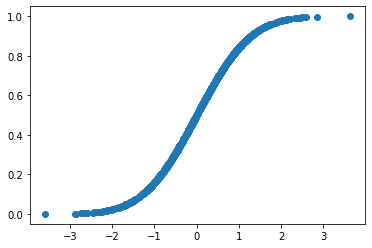

In [ ]:
from scipy import stats
z_new=stats.norm.cdf(z)
plt.scatter(z,z_new)
plt.show()

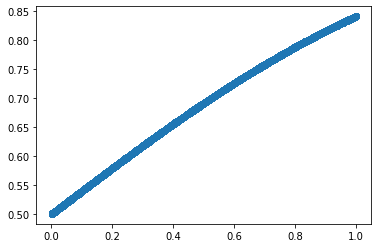

In [ ]:
cop_new=stats.norm.cdf(cop)
plt.scatter(cop,cop_new)
plt.show()

making pairs with x and y given in dataset z

In [ ]:
point=[]
for i in range(ap):
  for j in range(ap):
    point.append([z[i][0],z[j][1]])
len(point)


250000

 # **Performing CDF**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
from math import trunc

val=[]
distribution = mvn(mean=mean,cov = cov)
for i in point:
  a='%.2f'%distribution.cdf(i)
  val.append(float(a))

In [ ]:
xx=[]
yy=[]
for i in range(len(point)):
  xx.append(point[i][0])
  yy.append(point[i][1])
gauss_dict={'X':xx,'Y':yy,'Prob':val}
df_gauss=pd.DataFrame(gauss_dict)

In [ ]:
l1 = np.array(df_gauss['X'].to_list())
l2 = np.array(df_gauss['Y'].to_list())
l3 = np.array(df_gauss['Prob'].to_list())

dist_gauss = Table().with_columns(
   "X", l1,
   "Y", l2,
   "Prob", l3)
dist_gauss 

X,Y,Prob
-0.668679,-1.20219,0.05
-0.668679,-1.52151,0.03
-0.668679,0.33019,0.19
-0.668679,-2.84414,0
-0.668679,0.784853,0.22
-0.668679,-1.48935,0.03
-0.668679,1.18869,0.24
-0.668679,0.578303,0.21
-0.668679,0.301897,0.19
-0.668679,1.22608,0.24


In [ ]:
dist_gauss.to_joint()

/usr/local/lib/python3.7/dist-packages/prob140/multi_variable.py:396: UserWarning: Your probabilities sum to 67181.8299999989
  warnings.warn('Your probabilities sum to {0}'.format(total))


,X=-2.874442777385058,X=-2.7243516821491744,X=-2.695600228622361,X=-2.6041501609574587,X=-2.5977223086220445,X=-2.32080085988828,X=-2.2007583153569437,X=-2.1749270237703233,X=-2.1730046996057615,X=-2.151690410942962,X=-2.1379614046476947,X=-2.1091168800170377,X=-2.0984367250815197,X=-2.0420883706191764,X=-2.03955005503762,X=-2.024159468089304,X=-1.9085199203573078,X=-1.8284039284243325,X=-1.8069074328342734,X=-1.803024166205231,X=-1.775175362841013,X=-1.763666404386756,X=-1.7504059320482217,X=-1.7264123889269773,X=-1.7201289428195174,X=-1.6702611158617047,X=-1.662192314484822,X=-1.6507789206495553,X=-1.594712328446402,X=-1.5783899701098383,X=-1.5647369569534972,X=-1.5564354483925904,X=-1.5508296238399526,X=-1.5363571187527307,X=-1.5116577995879208,X=-1.494984287973162,X=-1.4901855566614755,X=-1.4877592898185656,X=-1.4825075832295163,X=-1.4814933643826507,...,X=1.3608200105810508,X=1.3614848245205078,X=1.3641154734559697,X=1.3673994768426299,X=1.3957106317408106,X=1.4118968414664081,X=1.456566486507752,X=1.4569794285794335,X=1.4659979519524728,X=1.4731878603232558,X=1.4798096747256344,X=1.4953765914353518,X=1.5106760685987555,X=1.5493628756772158,X=1.5921513767056759,X=1.611952839821166,X=1.614154200820118,X=1.624321871086249,X=1.6405335145074964,X=1.645664013064292,X=1.651086581686978,X=1.6720658896165583,X=1.7432091142982478,X=1.7857152465646668,X=1.8438900847622437,X=1.8511938268459085,X=1.9811509210491187,X=2.044047850089965,X=2.0666582714763715,X=2.0844241534141816,X=2.115205748595771,X=2.1172128966183537,X=2.1179715966762074,X=2.131343755478167,X=2.211408604195903,X=2.3943361198240765,X=2.4502045572912516,X=2.5771214892127725,X=2.8521860242812203,X=3.6201954362604867
Y=2.495775190704552,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,...,0.91,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.95,0.95,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.99,0.99
Y=2.483760116686671,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,...,0.91,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.94,0.95,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.99,0.99
Y=2.454836714672262,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,...,0.91,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.99
Y=2.3631154444311577,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,...,0.91,0.91,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.98,0.98,0.98,0.98,0.99,0.99,0.99
Y=2.342798218018424,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,...,0.91,0.91,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.92,0.92,0.93,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.95,0.95,0.96,0.96,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.98,0.98,0.98,0.99,0.99,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# **Plotting the graphs**

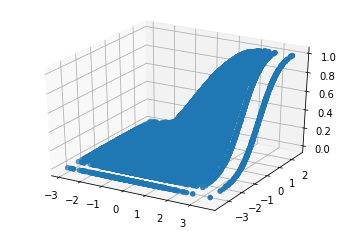

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(df_gauss['X'],df_gauss['Y'],df_gauss['Prob'])

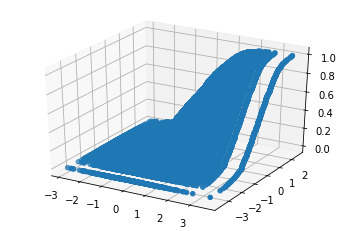

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(k['X'],k['Y'],k['Probability'])

calculate error and accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error
y1=df_gauss['Prob']
y2=k['Probability']
error=mean_absolute_error(y1,y2)
accuracy=1-error

In [ ]:
print("Accuracy",accuracy)
print("Error",error)

Accuracy 0.76214684
Error 0.23785316
